#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np

#### Read the dataset 

In [2]:
df=pd.read_csv("covid19.csv")

#### look at first few rows of the dataset and analyze

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


#### Look at how many rows and columns teh dataset has in total

In [4]:
df.shape

(270, 7)

#### statistical information about the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,270.0,135.500000,78.086491,1.0,68.25,135.5,202.75,270.0
ConfirmedIndianNational,270.0,5.551852,8.339625,0.0,1.00,3.0,6.00,60.0
ConfirmedForeignNational,270.0,1.329630,3.587288,0.0,0.00,0.0,0.00,14.0
Cured,270.0,0.603704,1.461522,0.0,0.00,0.0,0.00,9.0
Deaths,270.0,0.092593,0.290399,0.0,0.00,0.0,0.00,1.0


#### check the data types of the features inside the dataset

In [6]:
df.dtypes

Sno                          int64
Date                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
dtype: object

#### group the data with repsect to date to get the number of daily cases

In [7]:
df1=df.groupby('Date',sort=False).sum()

In [8]:
df1.head()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,,
30/01/20,1,1,0,0,0
31/01/20,2,1,0,0,0
01/02/20,3,2,0,0,0
02/02/20,4,3,0,0,0
03/02/20,5,3,0,0,0


#### drop the irrelevant columns

In [9]:
df1=df1.drop('Sno',axis=1)
df1.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


#### introduce a new column 'total cases and assign it to a new dataframe

In [13]:
df1['Total Cases'] = df1.sum(axis =1).astype('int')

In [14]:
df1

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


#### visualize the trend between the total number of cases with change in date

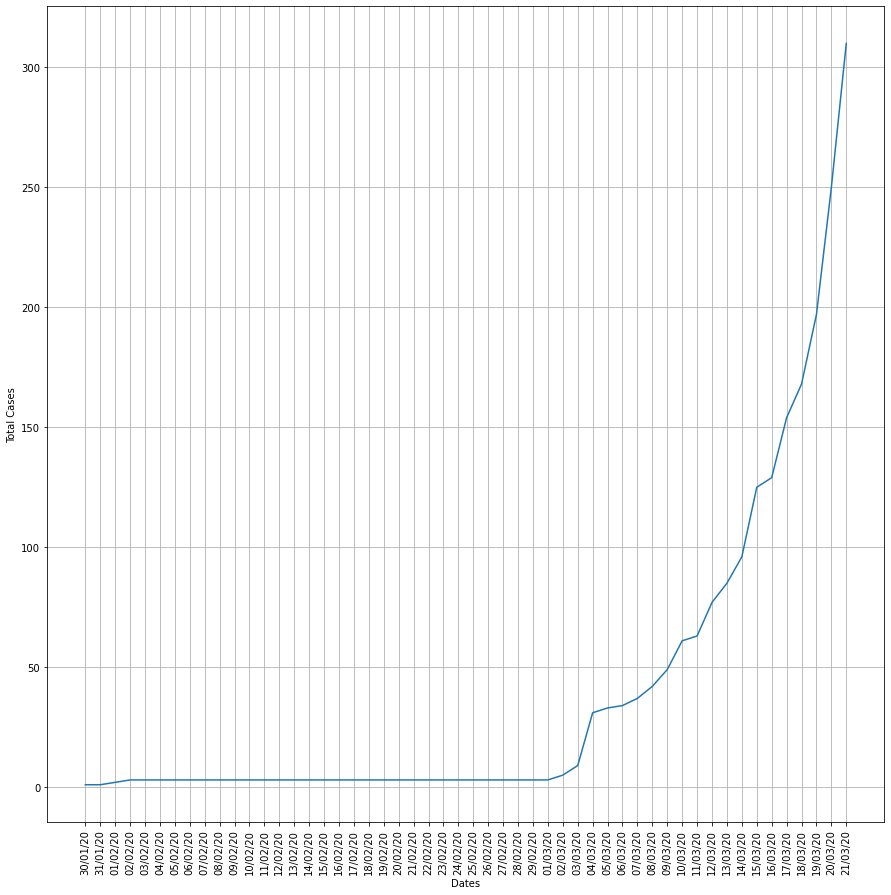

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(df1['Total Cases'])
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.xticks(rotation = 90, fontsize = 10)
plt.grid()
plt.show()

#### compute the rate of increase in total number of cases per day

In [17]:
r=[]
for i in range(0,df1.shape[0]-1):
    rate=(df1['Total Cases'].iloc[i+1]-df1['Total Cases'].iloc[i])/df1['Total Cases'].iloc[i]
    r.append(rate)

In [20]:
av=np.average(r)
av

0.15548289717820452

#### prediction using the exponential model

In [21]:
import math
P_o=31
t=26
P_t=round(P_o*(math.exp(av*t)))
P_t

1766